In [4]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import numpy.linalg as LA
from matplotlib.gridspec import GridSpec
import timeit
import datetime
import scipy.stats as stats
import glob

#folder='/Users/jen/Downloads/data'
#folder='/Users/jen/Dropbox/ATOC4500Spring2022_DataScienceLab/data/mesa/'
filedir='mesa/'

In [2]:
### NOTES
### 1) The file type switches in 2020 from .cdf to .nc.  The data are slightly different after that transition.
### As a result, 2020 is going to be an "interesting year to process." I recommend tackling it last... 
### First, 2021 (all .nc format) and then 2019 (all .cdf format).  Then, 2020 combining the two.
### 2) Some files have missing data.  For the .cdf files - that means some of them have fewer values.  I think 
### I will need to introduce a fill value for these data.
### 3) The data are every 5 minutes.  ## notes: time is 289 - 5 minute data. 
### 4) The files time is in UTC - starting at midnight UTC.
### 5) I got the data from the NCAR EOL ftp site (ftp://ftp.eol.ucar.edu/pub/archive/weather) - I used command line ftp on Cheyenne, then transferred to my
### local computer using globus 


<xarray.Dataset>
Dimensions:      (time: 289)
Coordinates:
  * time         (time) datetime64[ns] 2020-12-31 ... 2021-01-01
Data variables:
    lat          float64 ...
    lon          float64 ...
    alt          float64 ...
    pres         (time) float64 ...
    rain_accum   (time) float64 ...
    rh           (time) float64 ...
    tdry         (time) float64 ...
    wdir         (time) float64 ...
    wspd         (time) float64 ...
    wspd_max     (time) float64 ...
    U            (time) float64 ...
    V            (time) float64 ...
    dewpoint     (time) float64 ...
    cpres0       (time) float64 ...
    windchill    (time) float64 ...
    raina_event  (time) float64 ...
    raina_daily  (time) float64 ...
Attributes:
    site_name:      NCAR Mesa Lab
    site_location:  NCAR Mesa Lab, South West Boulder, CO
    Conventions:    CF-1.7


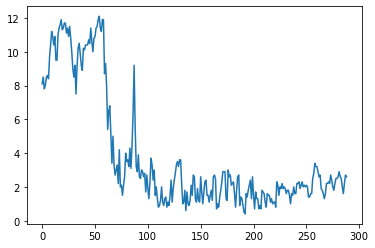

In [3]:
#### Here I read in a single file of the .nc (latest file type)
#### and make a plot of the windspeed variable.  units are m/s

filename='mlab.20201231.nc'
ds=xr.open_dataset(filedir+filename)
print(ds)

#print(ds['wmax'].shape)
#print(ds['time'])
#print(ds['base_time'].values)
#print(ds['time_offset'].values)

plt.plot(ds['wspd']);

In [4]:
### here I read in all of the nc files for a single year and then figure out how many are missing...

files2021=sorted(glob.glob(filedir+'mlab.202101*.nc'))
#print(files2021)
print(type(files2021))
print(len(files2021))
ds_nc=xr.open_mfdataset(files2021) ##,decode_times=True,concat_dim='time') 
#print(ds_nc)
print(ds_nc['tdry'].shape)
ds_nc

<class 'list'>
31
(8872,)


<xarray.Dataset>
Dimensions:      (time: 8872)
Coordinates:
  * time         (time) datetime64[ns] 2021-01-01 ... 2021-02-01
Data variables:
    lat          (time) float64 39.98 39.98 39.98 39.98 ... 39.98 39.98 39.98
    lon          (time) float64 -105.3 -105.3 -105.3 ... -105.3 -105.3 -105.3
    alt          (time) float64 1.885e+03 1.885e+03 ... 1.885e+03 1.885e+03
    pres         (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    rain_accum   (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    rh           (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    tdry         (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    wdir         (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    wspd         (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    wspd_max     (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    U            (time) float64 dask.array<shape=(8872,), chunksize=(289,)>
    V            (t

In [5]:
### here I read in all of the nc files for a single year and then figure out how many are missing...

files2021=sorted(glob.glob(filedir+'mlab.202101*.nc'))
#print(files2021)
print(type(files2021))
print(len(files2021))

print(files2021[0])

### loop to check the dimensions of the files - many are less than 288
count=0
for i in np.arange(0,len(files2021)): ##len(files))
    #print(files[0])
    foo=xr.open_dataset(files2021[i])
    if (len(foo['wspd_max'])!=289):
        print(files2021[i])
        print(len(foo['wspd_max']))
        count=count+1        
print(count) 

<class 'list'>
31
mesa/mlab.20210101.nc
mesa/mlab.20210107.nc
261
mesa/mlab.20210112.nc
288
mesa/mlab.20210113.nc
288
mesa/mlab.20210114.nc
288
mesa/mlab.20210120.nc
287
mesa/mlab.20210121.nc
235
6


<xarray.Dataset>
Dimensions:      (time: 235)
Coordinates:
  * time         (time) datetime64[ns] 2021-01-21 ... 2021-01-22
Data variables:
    lat          float64 ...
    lon          float64 ...
    alt          float64 ...
    pres         (time) float64 ...
    rain_accum   (time) float64 ...
    rh           (time) float64 ...
    tdry         (time) float64 ...
    wdir         (time) float64 ...
    wspd         (time) float64 ...
    wspd_max     (time) float64 ...
    U            (time) float64 ...
    V            (time) float64 ...
    dewpoint     (time) float64 ...
    cpres0       (time) float64 ...
    windchill    (time) float64 ...
    raina_event  (time) float64 ...
    raina_daily  (time) float64 ...
Attributes:
    site_name:      NCAR Mesa Lab
    site_location:  NCAR Mesa Lab, South West Boulder, CO
    Conventions:    CF-1.7
(235,)
(235,)
<xarray.DataArray 'time' (time: 235)>
array(['2021-01-21T00:00:00.000000000', '2021-01-21T00:05:00.000000000',
       '2021-

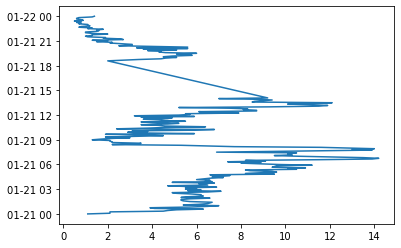

In [6]:
## here's what a nc file with missing data looks like

ds=xr.open_dataset('mesa/mlab.20210121.nc')
print(ds)

print(ds['wspd'].shape)
print(ds['time'].shape)

## notes: time is 289 - 5 minute data. on the UTC day - starting at midnight UTC.
#print(ds['base_time'].values)
#print(ds['time_offset'].values)

plt.plot(ds['wspd'],ds['time']);
print(ds['time'])

In [7]:
### convert the time in the .nc files into the seconds since midnight - WITH missing data

ds=xr.open_dataset('mesa/mlab.20210121.nc')

#print(ds['time'][0])
#print(ds['time'][1])
#print(ds['time'][1]-ds['time'][0])
#foo=(ds['time'][:]-ds['time'][0])*0.000000001

## calculate seconds since midnight
foo=(ds['time'][:]-ds['time'][0])  ## subtract the nano seconds of the first time
foo=foo/10**9 ## convert from nanoseconds to seconds
#print(foo.values)
#print(foo.shape)
#fool=np.int(foo.values)
seconds_since_00UTC=foo.values.astype(int)
print(seconds_since_00UTC.shape)
print(seconds_since_00UTC)

(235,)
[    0   300   600   900  1200  1500  1800  2100  2400  2700  3000  3300
  3600  3900  4200  4500  4800  5100  5400  5700  6000  6300  6600  6900
  7200  7500  7800  8100  8400  8700  9000  9300  9600  9900 10200 10500
 10800 11100 11400 11700 12000 12300 12600 12900 13200 13500 13800 14100
 14400 14700 15000 15300 15600 15900 16200 16500 16800 17100 17400 17700
 18000 18300 18600 18900 19200 19500 19800 20100 20400 20700 21000 21300
 21600 21900 22200 22500 22800 23100 23400 23700 24000 24300 24600 24900
 25200 25500 25800 26100 26400 26700 27000 27300 27600 27900 28200 28500
 28800 29100 29400 29700 30000 30300 30600 30900 31200 31500 31800 32100
 32400 32700 33000 33300 33600 33900 34200 34500 34800 35100 35400 35700
 36000 36300 36600 36900 37200 37500 37800 38100 38400 38700 39000 39300
 39600 39900 40200 40500 40800 41100 41400 41700 42000 42300 42600 42900
 43200 43500 43800 44100 44400 44700 45000 45300 45600 45900 46200 46500
 46800 47100 47400 47700 48000 48300 48600 4

<xarray.Dataset>
Dimensions:      (time: 287)
Coordinates:
  * time         (time) datetime64[ns] 2021-12-30 ... 2021-12-31
Data variables:
    lat          float64 ...
    lon          float64 ...
    alt          float64 ...
    pres         (time) float64 ...
    rain_accum   (time) float64 ...
    rh           (time) float64 ...
    tdry         (time) float64 ...
    wdir         (time) float64 ...
    wspd         (time) float64 ...
    wspd_max     (time) float64 ...
    U            (time) float64 ...
    V            (time) float64 ...
    dewpoint     (time) float64 ...
    cpres0       (time) float64 ...
    windchill    (time) float64 ...
    raina_event  (time) float64 ...
    raina_daily  (time) float64 ...
Attributes:
    site_name:      NCAR Mesa Lab
    site_location:  NCAR Mesa Lab, South West Boulder, CO
    Conventions:    CF-1.7
(287,)
(287,)
<xarray.DataArray 'time' (time: 287)>
array(['2021-12-30T00:00:00.000000000', '2021-12-30T00:05:00.000000000',
       '2021-

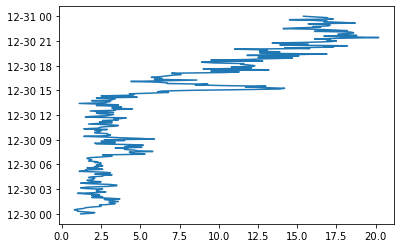

In [8]:
## here's what a nc file withOUT missing data looks like

ds=xr.open_dataset('mesa/mlab.20211230.nc')
print(ds)

print(ds['wspd'].shape)
print(ds['time'].shape)

## notes: time is 289 - 5 minute data. on the UTC day - starting at midnight UTC.
#print(ds['base_time'].values)
#print(ds['time_offset'].values)

plt.plot(ds['wspd'],ds['time']);
print(ds['time'])

In [9]:
### convert the time in the .nc files into the seconds since midnight - no missing data

ds=xr.open_dataset('mesa/mlab.20211230.nc')

#print(ds['time'][0])
#print(ds['time'][1])
#print(ds['time'][1]-ds['time'][0])
#foo=(ds['time'][:]-ds['time'][0])*0.000000001

## calculate seconds since midnight
foo=(ds['time'][:]-ds['time'][0])  ## subtract the nano seconds of the first time
foo=foo/10**9 ## convert from nanoseconds to seconds
#print(foo.values)
#print(foo.shape)
#fool=np.int(foo.values)
seconds_since_00UTC=foo.values.astype(int)
print(seconds_since_00UTC.shape)
print(seconds_since_00UTC)

(287,)
[    0   300   600   900  1200  1500  1800  2100  2400  2700  3000  3300
  3600  3900  4200  4500  4800  5100  5400  5700  6000  6300  6600  6900
  7200  7500  7800  8100  8400  8700  9000  9300  9600  9900 10200 10500
 10800 11100 11400 11700 12000 12300 12600 12900 13200 13500 13800 14100
 14400 14700 15000 15300 15600 15900 16200 16500 16800 17100 17400 17700
 18000 18300 18600 18900 19200 19500 19800 20100 20400 20700 21000 21300
 21600 21900 22200 22500 22800 23100 23400 23700 24000 24300 24600 24900
 25200 25500 25800 26100 26400 26700 27000 27300 27600 27900 28200 28500
 28800 29100 29400 29700 30000 30300 30600 30900 31200 31500 31800 32100
 32400 32700 33000 33300 33600 33900 34200 34500 34800 35100 35400 35700
 36000 36300 36600 36900 37200 37500 37800 38100 38400 38700 39000 39300
 39600 39900 40200 40500 40800 41100 41400 41700 42000 42300 42600 42900
 43200 43500 43800 44100 44400 44700 45000 45300 45600 45900 46200 46500
 46800 47100 47400 47700 48000 48300 48600 4

In [10]:
##### BELOW CODE IS to diagnose what is going on with the cdf files

In [5]:
### here I read in all of the cdf files for a single year and then figure out how many are missing...

files2019=sorted(glob.glob(filedir+'mlab.2019*.cdf'))
#print(files)
print(type(files2019))
print(len(files2019))
#ds_cdf=xr.open_mfdataset(files,decode_times=True) ##,concat_dim='time') #
#print(ds_cdf)
#print(ds_cdf['tdry'].shape)

print(files2019[0])

### loop to check the dimensions of the files - many are less than 288
count=0
for i in np.arange(0,len(files2019)): ##len(files))
    #print(files[0])
    foo=xr.open_dataset(files2019[i])
    if (len(foo['wmax'])!=288):
        #print(files2019[i])
        #print(len(foo['wmax']))
        count=count+1        
print(count) 

<class 'list'>
365
mesa/mlab.20190101.cdf
42


<xarray.Dataset>
Dimensions:      (time: 34)
Dimensions without coordinates: time
Data variables:
    base_time    int32 ...
    samp_secs    int32 ...
    lat          float32 ...
    lon          float32 ...
    alt          float32 ...
    station      int32 ...
    time_offset  (time) float32 ...
    tdry         (time) float32 ...
    rh           (time) float32 ...
    pres         (time) float32 ...
    cpres0       (time) float32 ...
    dp           (time) float32 ...
    wdir         (time) float32 ...
    wspd         (time) float32 ...
    wmax         (time) float32 ...
    wsdev        (time) float32 ...
    wchill       (time) float32 ...
    raina        (time) float32 ...
    raina24      (time) float32 ...
    bat          (time) float32 ...
<xarray.DataArray 'time_offset' (time: 34)>
array([   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100., 2400., 2700.,
       3000., 3300., 3600., 3900., 4200., 4500., 4800., 5100., 5400., 5700.,
       6000., 6300., 6600., 6900

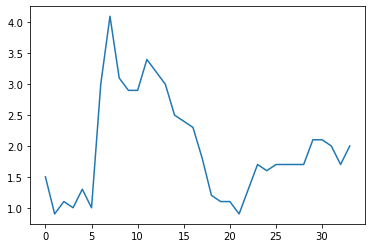

In [6]:
## here's what a cdf file with missing data looks like

ds=xr.open_dataset('mesa/mlab.20190413.cdf')
print(ds)

#print(ds['wmax'].shape)
#print(ds['time'])

## notes: time is 289 - 5 minute data. on the UTC day - starting at midnight UTC.
#print(ds['base_time'].values)
#print(ds['time_offset'].values)

plt.plot(ds['wspd']);
print(ds['time_offset'])

In [ ]:
#### here's what a cdf file without missing data looks like

ds=xr.open_dataset('mesa/mlab.20190412.cdf')
print(ds)

#print(ds['wmax'].shape)
#print(ds['time'])

## notes: time is 289 - 5 minute data. on the UTC day - starting at midnight UTC.
#print(ds['base_time'].values)
#print(ds['time_offset'].values)

plt.plot(ds['wspd']);
print(ds['time_offset'])

In [ ]:
### missing value code

a = np.array([0,600,1800])
print(a)
b = np.arange(0,1800+300,300)
print(b)

### find which arrays match
match_boolean=np.in1d(b,a)
match_idx=np.arange(b.shape[0])[np.in1d(b,a)]

## first I need to make a the same size as b
a_withmissing=np.zeros(len(b))-999
a_withmissing[match_idx]=b[match_idx]
print(a_withmissing)


In [ ]:
###### SCRATCH CODE FOR TESTING PYTHON - not needed
scratch=0

if scratch==1:

    all_seconds=np.arange(0,86400+300,300)
    print(all_seconds.shape)
    #print(all_seconds)

    some_seconds=np.arange(0,86400+300,600)
    print(some_seconds.shape)
    #print(some_seconds)

    ### first - i find which arrays match
    #match_boolean=np.in1d(all_seconds,some_seconds)
    match_idx=np.arange(all_seconds.shape[0])[np.in1d(all_seconds,some_seconds)]
    ## then I need to make a the same size as all_seconds, use fill value
    some_seconds_withmissing=np.zeros(len(all_seconds))-999
    ## then I need to fill in the some_seconds where there is a good value
    some_seconds_withmissing[match_idx]=all_seconds[match_idx]
    print(some_seconds_withmissing.shape)

    a = np.array([0,600,1800])
    print(a)
    b = np.arange(0,1800+300,300)
    print(b)

    ### find which arrays match
    match_boolean=np.in1d(b,a)
    match_idx=np.arange(b.shape[0])[np.in1d(b,a)]

    ## first I need to make a the same size as b
    a_withmissing=np.zeros(len(b))-999
    a_withmissing[match_idx]=b[match_idx]
    print(a_withmissing)